<hr>
<p style="text-align:left;">
    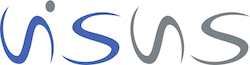
    <span style="float:right;">
        University of Stuttgart<br />Visualization Research Center
    </span>
</p>
<hr>
<p style="text-align:left;">
    <span style="float:left;">
        Prof. Daniel Weiskopf
    </span>
    <span style="float:right;">
        Sunday, 2024-11-03
    </span>
</p>
<br/>

# Theoretical and Methodological Foundations of Visual Computing
## Assignment 03
Responsible tutor: Isha Sharma
<br/>

> *Please submit your solution to ILIAS by <b>Sunday, 2024-11-10, 23:55</b>. <br /> Solutions will be discussed in the tutorial on <b>Thursday, 2024-11-14</b>.* <br /> *Please note that source code will only be accepted if it compiles.*
<hr>

**Student name(s):** <font color='green'>Guangxin Zhao</font> <br />
**Immatriculation number(s):** <font color='green'>st194136</font> <br />

<hr>

### Exercise 3.1 (7 points)
Let $f(x,y) = x^6 + y^6 - 3x^2- 3y^2, \mathbb{R}^2\mapsto\mathbb{R}$. Critical points satisfy $\vec{\nabla} f= \vec{0}$. For each critical point $\vec{a}$ its type is given by:

$$
\vec{a} := \left\{
\begin{array}{ll}
\text{local minima,} & \quad \text{if } \frac{\partial^2 f}{\partial x^2}(\vec{a}) > 0 \text{ and } \det H_{f}(\vec{a}) > 0, \\[5pt]
\text{local maxima,} & \quad \text{if } \frac{\partial^2 f}{\partial x^2}(\vec{a}) < 0 \text{ and } \det H_{f}(\vec{a}) > 0, \\[5pt]
\text{saddle point,} & \quad \text{if } \det H_{f}(\vec{a}) < 0, \\
\end{array} \right\},
$$

 where $\vec{\nabla} f$ and $ H_{f}$ are the gradient and the Hesse matrix of the function $f$, respectively.

`(a)` Find the critical points of \( f \) and determine their type.



Given that 

\begin{equation*}
\vec{\nabla} f=
    \begin{pmatrix}
        \frac{\partial f}{\partial x}(x,y) \\
        \frac{\partial f}{\partial y}(x,y)
    \end{pmatrix}=
    \begin{pmatrix}
        6x^5-6x \\
        6y^5-6y
    \end{pmatrix}
\end{equation*}

, and 

\begin{equation*}
H_f=
    \begin{pmatrix}
        \frac{\partial^2 f}{\partial x^2}(x,y) & \frac{\partial^2 f}{\partial y\partial x}(x,y) \\
        \frac{\partial^2 f}{\partial x\partial y}(x,y) & \frac{\partial^2 f}{\partial y^2}(x,y) \\
    \end{pmatrix}=
    \begin{pmatrix}
        30x^4-6 & 0 \\
        0 & 30y^4-6
    \end{pmatrix}.
\end{equation*}

$\det H_f$ is given by $(30x^4-6)(30y^4-6)$.

If $\vec{\nabla f}=\vec{0}$, we have

\begin{equation*}
    \begin{cases}
        6x^5-6x = 0 \\
        6y^5-6y = 0
    \end{cases}\Rightarrow
    \begin{cases}
        x = 0, \pm 1 \\
        y = 0, \pm 1
    \end{cases}.
\end{equation*}

Thus, the saddle points are $(0,0),(0,1),(0,-1),(1,0),(1,1),(1,-1),(-1,0),(-1,1),(-1,-1)$.

Also, $\frac{\partial^2 f}{\partial x^2}=30x^4-6$.

Combining all the conditions above, we have then

\begin{equation*}
    \begin{cases}
        \text{local minima: } (1,1),(1,-1),(-1,1),(-1,-1) \\
        \text{local maxima: } (0,0) \\
        \text{saddle point: } (0,1),(0,-1),(1,0),(-1,0) \\
    \end{cases}.
\end{equation*}


`(b)` Check your results with Python and provide a plot of the given function that shows both the surface and the contour in a reasonable manner.  
   


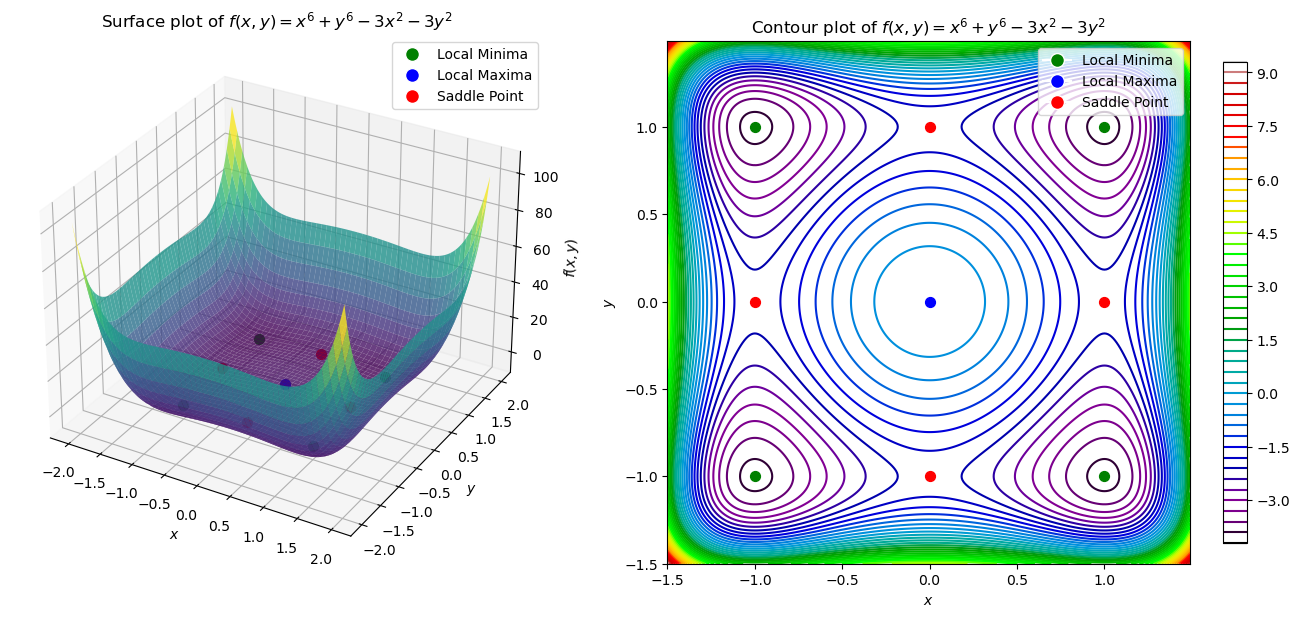

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

# Define the function f(x, y) = x^6 + y^6 - 3x^2 - 3y^2
def f(x, y):
    return np.power(x, 6) + np.power(y, 6) - 3 * np.power(x, 2) - 3 * np.power(y, 2)

# Define the local minima, local maxima, and saddle points
local_minima = [(1, 1), (1, -1), (-1, 1), (-1, -1)]
local_maxima = [(0, 0)]
saddle_points = [(0, 1), (0, -1), (1, 0), (-1, 0)]

# Define the legend elements
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Local Minima'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Local Maxima'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Saddle Point')
]

# Make data
X = np.arange(-2, 2, 0.01)
Y = np.arange(-2, 2, 0.01)
X, Y = np.meshgrid(X, Y)
Z = f(X, Y)

# Create a figure
fig = plt.figure(figsize=(14, 6))

# Plot the surface
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax1.set_title('Surface plot of $f(x,y) = x^6 + y^6 - 3x^2 - 3y^2$')
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')
ax1.set_zlabel('$f(x,y)$')
ax1.legend(handles=legend_elements)

# Add critical points to the 3D plot
for x_val, y_val in local_minima:
    ax1.scatter(x_val, y_val, f(x_val, y_val), color='green', s=50, label='Local Minima')
for x_val, y_val in local_maxima:
    ax1.scatter(x_val, y_val, f(x_val, y_val), color='blue', s=50, label='Local Maxima')
for x_val, y_val in saddle_points:
    ax1.scatter(x_val, y_val, f(x_val, y_val), color='red', s=50, label='Saddle Point')

X = np.arange(-1.5, 1.5, 0.01)
Y = np.arange(-1.5, 1.5, 0.01)
X, Y = np.meshgrid(X, Y)
Z = f(X, Y)

# Plot the contour
ax2 = fig.add_subplot(122)
contour = ax2.contour(X, Y, Z, levels=50, cmap='nipy_spectral')
ax2.set_title('Contour plot of $f(x,y) = x^6 + y^6 - 3x^2 - 3y^2$')
ax2.set_xlabel('$x$')
ax2.set_ylabel('$y$')
ax2.set_aspect('equal', 'box')
ax2.legend(handles=legend_elements)
fig.colorbar(contour, ax=ax2, orientation='vertical', shrink=0.9)

# Add critical points to the 2D contour plot
for x_val, y_val in local_minima:
    ax2.scatter(x_val, y_val, color='green', s=50, label='Local Minima')
for x_val, y_val in local_maxima:
    ax2.scatter(x_val, y_val, color='blue', s=50, label='Local Maxima')
for x_val, y_val in saddle_points:
    ax2.scatter(x_val, y_val, color='red', s=50, label='Saddle Point')

plt.tight_layout()
plt.show()


`(c)` Multiple choice questions: only one answer is correct. Please use a cross to mark the correct answer.

   A justification for the choice is mandatory. Provide a justification in the space under numbered according to the question.

   1. **The Hessian matrix of an arbitrary function** $g: \mathbb{R}^2 \rightarrow \mathbb{R}$ **is...**

      - [ ] always symmetric.
      - [ ] symmetric, if $g \in \mathcal{C}^1$ \.
      - [x] symmetric, if $g \in \mathcal{C}^2$ \.
      - [ ] never symmetric.
     
      **Justification:** Since the Hessian matrix is the second derivative of the function, it is symmetric if the function is twice continuously differentiable, i.e. $\frac{\partial^2 f}{\partial y\partial x}=\frac{\partial^2 f}{\partial x\partial y}$.

   2. **For a function** $g: \mathbb{R}^2 \rightarrow \mathbb{R}$ \, **it holds: the closer different contour lines are, the...**

      - [x] steeper/larger the gradients are.
      - [ ] flatter/smaller the gradients are.
      - [ ] ... the gradient does not care about contour lines!
      - [ ] ... it is not possible to provide a clear answer!
  
      **Justification:** Since the gradient is always perpendicular to the contour line. The closer the contour lines are, the steeper the function is, and the larger the gradient is.

   3. **Contour lines of a continuous function** $f: \mathbb{R}^2 \rightarrow \mathbb{R}$ **for different isovalues**, i.e., $N_{c_1}$ and $N_{c_2}$ with $c_1 \neq c_2$ , **...**

      - [x] never cross.
      - [ ] can only cross once.
      - [ ] can cross multiple times (but not infinitely).
      - [ ] can cross infinitely.
  
      **Justification:** Since the contour line shows the points with the same function value, the contour lines of different isovalues can never cross.

   4. **Which of the vectors (orange arrows) in the figure below (blue curves are contour lines) could possibly be a gradient?**

      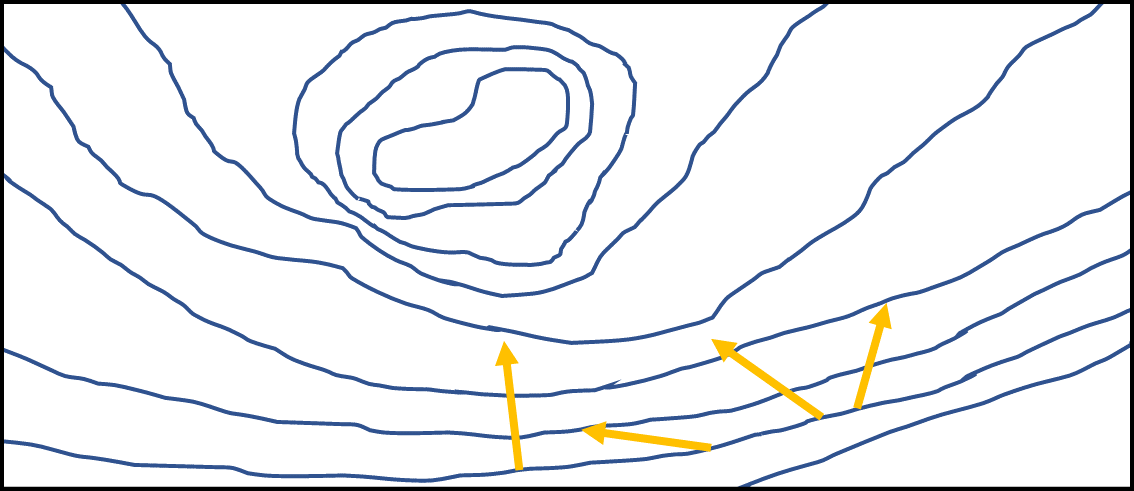


      - [ ] all of them.
      - [ ] none of them.
      - [ ] only the most right one.
      - [x] only the most left one.
  
      **Justification:** Since the gradient should always perpendicular to the contour line, only the leftmost one is correct.


### Exercise 3.2 (3 points)


A vector field $\vec{f}(x,y,z)$ with $\mathbf{curl} \vec{f}(x,y,z) = \vec{0}$ everywhere is called *irrotational*.
In this case, a function $\psi(x,y,z)$ can be found, such that $\vec{f} = (\partial_x \psi, \partial_y \psi, \partial_z \psi)^{T}$. 

Let $\vec{f}(x,y,z) = (2x\cos y, -x^2\sin y, 2z)^{T}$.

`(a)` Verify that $\mathbf{curl} \vec{f} = \vec{0}$ everywhere.


Recall that the curl of a vector field $\vec{f} = (x, y, z)^{T}$ is defined as

\begin{equation*}
    \mathbf{curl} \vec{f}=\vec{\nabla} \times \vec{f}=
    \begin{pmatrix}
        \partial_{x_1} \\
        \partial_{x_2} \\
        \partial_{x_3}
    \end{pmatrix}\times
    \begin{pmatrix}
        f_1 \\
        f_2 \\
        f_3
    \end{pmatrix}=
    \begin{pmatrix}
        \frac{\partial f_3}{\partial x_2} - \frac{\partial f_2}{\partial x_3} \\
        \frac{\partial f_1}{\partial x_3} - \frac{\partial f_3}{\partial x_1} \\
        \frac{\partial f_2}{\partial x_1} - \frac{\partial f_1}{\partial x_2}
    \end{pmatrix}.
\end{equation*}

Take $\vec{f}(x,y,z) = (2x\cos y, -x^2\sin y, 2z)^{T}$, we have

\begin{equation*}
    \mathbf{curl} \vec{f}=
    \begin{pmatrix}
        \frac{\partial f_3}{\partial y} - \frac{\partial f_2}{\partial z} \\
        \frac{\partial f_1}{\partial z} - \frac{\partial f_3}{\partial x} \\
        \frac{\partial f_2}{\partial x} - \frac{\partial f_1}{\partial y}
    \end{pmatrix}=
    \begin{pmatrix}
        0 \\
        0 \\
        -2x\sin y + 2x\sin y
    \end{pmatrix}=
    \begin{pmatrix}
        0 \\
        0 \\
        0
    \end{pmatrix}.
\end{equation*}

Thus, $\mathbf{curl} \vec{f} = \vec{0}$ everywhere.


`(b)` Find a function $\psi(x,y,z)$ such that $\vec{f} = (\partial_x \psi, \partial_y \psi, \partial_z \psi)^{T}$.


Since $\vec{f} = (\partial_x \psi, \partial_y \psi, \partial_z \psi)^{T}$, we have

\begin{equation*}
    \begin{cases}
        \partial_x \psi = 2x\cos y, \\
        \partial_y \psi = -x^2\sin y, \\
        \partial_z \psi = 2z.
    \end{cases}
\end{equation*}

Integrating the above equations, we have

\begin{equation*}
    \begin{cases}
        \psi = x^2\cos y + g(y,z), \\
        \psi = x^2\cos y + h(x,z), \\
        \psi = z^2 + k(x,y).
    \end{cases}
\end{equation*}

Thus, $\psi = x^2\cos y + z^2 + C$, where $C$ is a constant.

<hr>

### Exercise 3.3 (4 points)

Given the exponential function $f: \mathbb{R} \rightarrow \mathbb{R}, f(x) = e^x$.

`(a)` Compute the **complete** Taylor expansion around the point $a = 0$.

For a function $f(x)$, the Taylor expansion around the point $a$ is given by

\begin{align*}
    f(x) &= f(a) + \frac{df}{dx}(a)(x-a) + \frac{1}{2!}\frac{d^2f}{dx^2}(a)(x-a)^2 + \frac{1}{3!}\frac{d^3f}{dx^3}(a)(x-a)^3 + \cdots \\
         &= \sum_{n=0}^{\infty} \frac{f^{(n)}(a)}{n!}(x-a)^n.
\end{align*}

With $a=0$ and $f(x)=e^x$, we have

\begin{align*}
    e^x &= e^0 + e^0(x-0) + \frac{e^0}{2!}(x-0)^2 + \frac{e^0}{3!}(x-0)^3 + \cdots \\
        &= \sum_{n=0}^{\infty} \frac{e^0}{n!}x^n \\
        &= \sum_{n=0}^{\infty} \frac{x^n}{n!}.
\end{align*}

`(b)` Verify with an animated plot that the Taylor expansion approximates the original function $f$ on the entire domain $\mathbb{R}$. It is sufficient to provide the animated plot on the interval $[-5,5]$.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Define function f(x)=e^x
def f(x):
    return np.exp(x)

# Define the Taylor series approximation
def taylor_approximation(x, n):
    approximation = np.zeros_like(x)
    for i in range(n + 1):
        approximation += (x**i) / np.math.factorial(i)
    return approximation

# Setup for the plot
x_values = np.linspace(-5, 5, 1000)
y_values = f(x_values)

fig, ax = plt.subplots()
ax.set_xlim(-5, 5)
ax.plot(x_values, y_values, 'r-', lw=1.5, label="Original function")
taylor, = ax.plot([], [], lw=2, label="Taylor Approximation")
ax.legend()

# Update function for the animation
def update(n):
    y_approx = taylor_approximation(x_values, n)
    taylor.set_data(x_values, y_approx)
    ax.set_title(f'Taylor Series Approximation of $f(x)=e^x$ with n={n} terms')
    return taylor

# Create the animation
anim = FuncAnimation(fig, update, frames=range(1, 15), blit=False, repeat=True)

plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.grid(True)
plt.close(fig)

# Display the animation
from IPython.display import HTML
HTML(anim.to_jshtml())

`(c)` Find a function $g\colon D \subseteq \mathbb{R} \rightarrow \mathbb{R}$, where the Taylor expansion does *not* approximate the original function $g$ on the entire domain $D$.

Consider the following function

\begin{equation*}
    g(x) = \begin{cases}
        e^{-\frac{1}{x^2}}, & x \neq 0, \\
        0, & x = 0.
    \end{cases}
\end{equation*}

The Taylor expansion of $g(x)$ around $a=0$ is given by

\begin{equation*}
    g(x) = g(0) + \frac{dg}{dx}(0)(x-0) + \frac{1}{2!}\frac{d^2g}{dx^2}(0)(x-0)^2 + \frac{1}{3!}\frac{d^3g}{dx^3}(0)(x-0)^3 + \cdots.
\end{equation*}

The $n$-th derivative of $g(x)$ when $x \neq 0$ consists of two parts: the derivative of $e^{-\frac{1}{x^2}}$ and the derivative of $\frac{1}{x^{2n}}$. However, as $x \to 0$, each derivative of $e^{-\frac{1}{x^2}}$ tends to $0$ faster than any polynomial rate, resulting in all derivatives being zero at $x = 0$.

Thus, the Taylor expansion of $g(x)$ around $a=0$ is $g(x) = 0$ for all $x \in \mathbb{R}$, which does not approximate the original function $g(x)$ on the entire domain $\mathbb{R}$.

<hr>

### Exercise 3.4 (6 points)

Given the function $f\colon \mathbb{R}^2 \to \mathbb{R},  f(x,y) = x^2 y^2$. 

`(a)` Compute the **complete** Taylor expansion around the point $a=(1,0.5)$.

For a function $f(x,y)$, the Taylor expansion around the point $(a,b)$ is given by

\begin{align*}
    f(x,y) &= f(a,b) + \frac{\partial f}{\partial x}(a,b)(x-a) + \frac{\partial f}{\partial y}(a,b)(y-b) + \frac{1}{2}\frac{\partial^2 f}{\partial x^2}(a,b)(x-a)^2 + \frac{\partial^2 f}{\partial x \partial y}(a,b)(x-a)(y-b) + \frac{1}{2}\frac{\partial^2 f}{\partial y^2}(a,b)(y-b)^2 + \cdots \\
           &= \sum_{n=0}^{\infty} \sum_{m=0}^{n} \frac{1}{n!m!} \frac{\partial^{n+m} f}{\partial x^n \partial y^m}(a,b)(x-a)^n(y-b)^m.
\end{align*}

For function $f(x,y)=x^2y^2$, we can notice that

\begin{align*}
    \text{First-order derivatives:} \\
    &\frac{\partial f}{\partial x} = 2xy^2, \frac{\partial f}{\partial y} = 2x^2y, \\
    \text{Second-order derivatives:} \\
    &\frac{\partial^2 f}{\partial x^2} = 2y^2, \frac{\partial^2 f}{\partial x \partial y} = 4xy, \frac{\partial^2 f}{\partial y^2} = 2x^2, \\
    \text{Third-order derivatives:} \\
    &\frac{\partial^3 f}{\partial x^3} = 0, \frac{\partial^3 f}{\partial x^2 \partial y} = 4y, \frac{\partial^3 f}{\partial x \partial y^2} = 4x, \frac{\partial^3 f}{\partial y^3} = 0, \\
    \text{Fourth-order derivatives:} \\
    &\frac{\partial^4 f}{\partial x^4} = 0, \frac{\partial^4 f}{\partial x^3 \partial y} = 0, \frac{\partial^4 f}{\partial x^2 \partial y^2} = 4, \frac{\partial^4 f}{\partial x \partial y^3} = 0, \frac{\partial^4 f}{\partial y^4} = 0.
\end{align*}

Thus, for all derivatives of order higher than 4, we have

$$
\frac{\partial^n f}{\partial x^m \partial y^{n-m}} = 0 \text{ for } n > 4.
$$

With $a=(1,0.5)$ and $f(x,y)=x^2y^2$, we can then write the Taylor expansion as

\begin{align*}
    f(x, y) &= f(1, 0.5) + \frac{\partial f}{\partial x}(1, 0.5)(x - 1) + \frac{\partial f}{\partial y}(1, 0.5)(y - 0.5) + \frac{1}{2} \frac{\partial^2 f}{\partial x^2}(1, 0.5)(x - 1)^2 + \frac{\partial^2 f}{\partial x \partial y}(1, 0.5)(x - 1)(y - 0.5) + \frac{1}{2} \frac{\partial^2 f}{\partial y^2}(1, 0.5)(y - 0.5)^2 \\
            &\quad + \frac{1}{2} \frac{\partial^3 f}{\partial x^2 \partial y}(1, 0.5)(x - 1)^2(y - 0.5) + \frac{1}{2} \frac{\partial^3 f}{\partial x \partial y^2}(1, 0.5)(x - 1)(y - 0.5)^2 + \frac{1}{2\cdot 2}\frac{\partial^4 f}{\partial x^2 \partial y^2}(1, 0.5)(x - 1)^2(y - 0.5)^2 \\
            &= 0.25 + 0.5(x - 1) + (y - 0.5) + 0.25(x - 1)^2 + 2(x - 1)(y - 0.5) + (y - 0.5)^2 + \\
            &\quad + (x - 1)^2(y - 0.5) + 2(x - 1)(y - 0.5)^2 + (x - 1)^2(y - 0.5)^2.
\end{align*}

`(b)` Using the results from `(a)`, plot the first/second/third/... order Taylor expansions around $a$  in comparison to the function $f$ in Python.

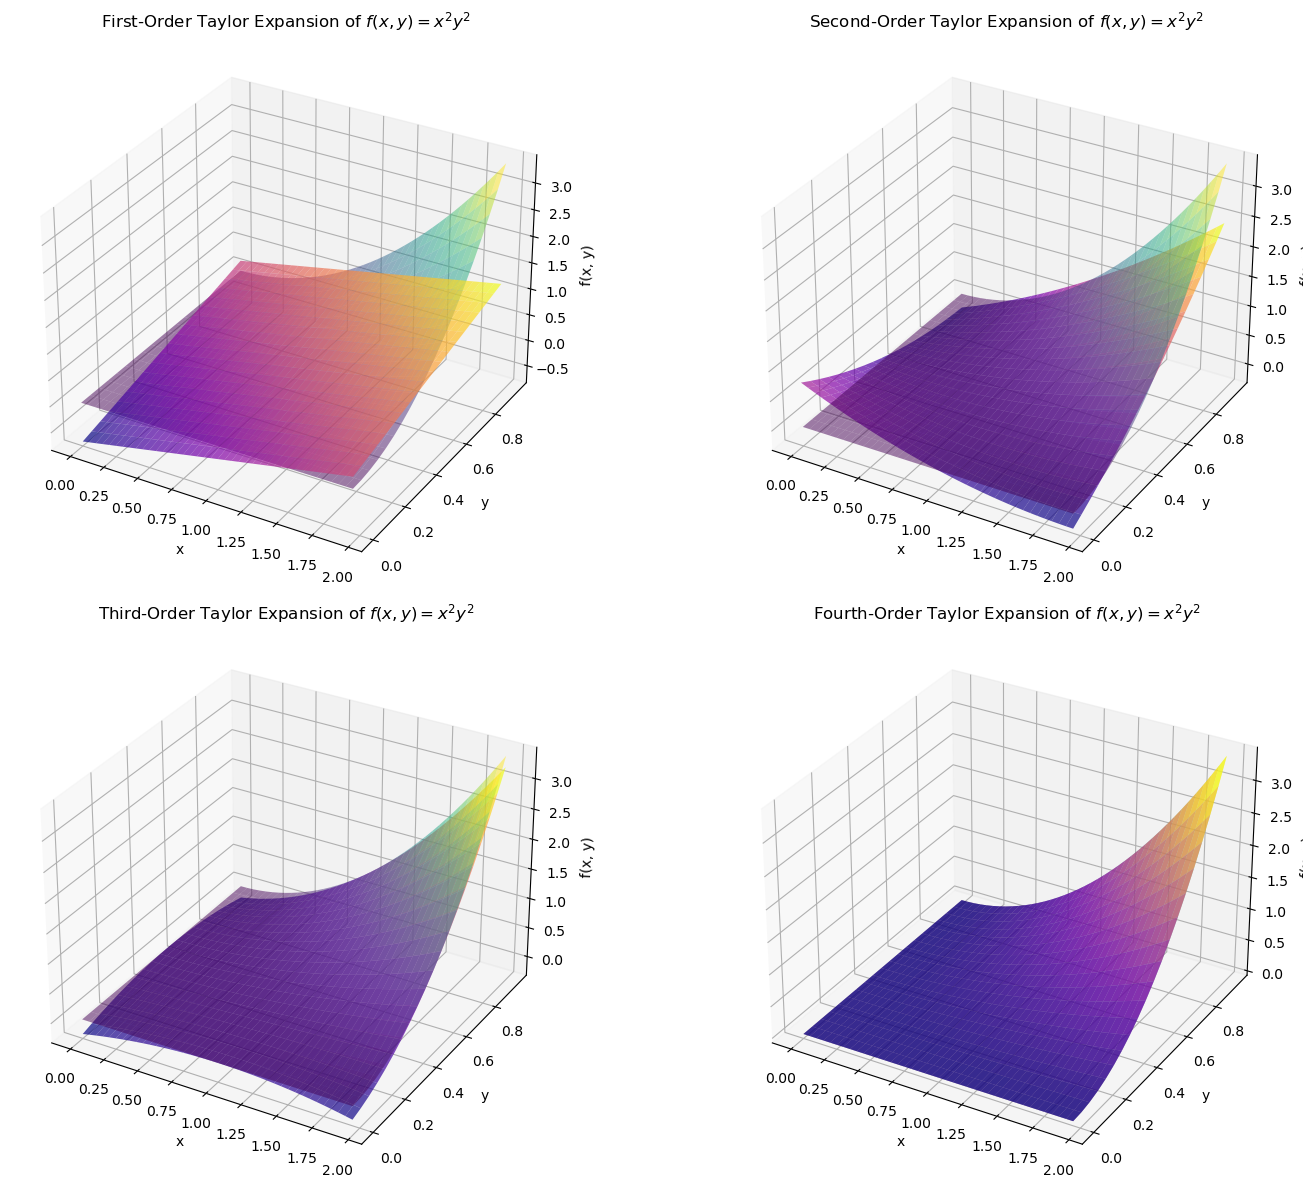

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the function f(x,y) = x^2*y^2
def f(x, y):
    return x**2 * y**2

# Define the Taylor expansions around (1, 0.5)
def first_order_approximation(x, y):
    return 0.25 + 0.5 * (x - 1) + (y - 0.5)

def second_order_approximation(x, y):
    return first_order_approximation(x, y) + 0.25 * (x - 1)**2 + 2 * (x - 1) * (y - 0.5) + (y - 0.5)**2

def third_order_approximation(x, y):
    return second_order_approximation(x, y) + (x - 1)**2 * (y - 0.5) + 2 * (x - 1) * (y - 0.5)**2

def fourth_order_approximation(x, y):
    return third_order_approximation(x, y) + (x - 1)**2 * (y - 0.5)**2

# Make data
X = np.arange(0, 2, 0.05)
Y = np.arange(0, 1, 0.05)
X, Y = np.meshgrid(X, Y)

# Evaluate the functions
Z_original = f(X, Y)
Z_first = first_order_approximation(X, Y)
Z_second = second_order_approximation(X, Y)
Z_third = third_order_approximation(X, Y)
Z_fourth = fourth_order_approximation(X, Y)

# Plot the functions
fig = plt.figure(figsize=(16, 12))

# First-order expansion
ax1 = fig.add_subplot(221, projection='3d')
ax1.plot_surface(X, Y, Z_original, cmap='viridis', alpha=0.5)
ax1.plot_surface(X, Y, Z_first, cmap='plasma', alpha=0.7)
ax1.set_title('First-Order Taylor Expansion of $f(x, y) = x^2 y^2$')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('f(x, y)')

# Second-order expansion
ax2 = fig.add_subplot(222, projection='3d')
ax2.plot_surface(X, Y, Z_original, cmap='viridis', alpha=0.5)
ax2.plot_surface(X, Y, Z_second, cmap='plasma', alpha=0.7)
ax2.set_title('Second-Order Taylor Expansion of $f(x, y) = x^2 y^2$')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('f(x, y)')

# Third-order expansion
ax3 = fig.add_subplot(223, projection='3d')
ax3.plot_surface(X, Y, Z_original, cmap='viridis', alpha=0.5)
ax3.plot_surface(X, Y, Z_third, cmap='plasma', alpha=0.7)
ax3.set_title('Third-Order Taylor Expansion of $f(x, y) = x^2 y^2$')
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_zlabel('f(x, y)')

# Fourth-order expansion
ax4 = fig.add_subplot(224, projection='3d')
ax4.plot_surface(X, Y, Z_original, cmap='viridis', alpha=0.5)
ax4.plot_surface(X, Y, Z_fourth, cmap='plasma', alpha=0.7)
ax4.set_title('Fourth-Order Taylor Expansion of $f(x, y) = x^2 y^2$')
ax4.set_xlabel('x')
ax4.set_ylabel('y')
ax4.set_zlabel('f(x, y)')

plt.tight_layout()
plt.show()

<div class="alert alert-success">

### Guidelines for Submission

Do not forget to update the student name(s) and matriculation number(s). 

**Text-based Responses**

For text-based questions, a markdown cell with the placeholder `Cell left blank for student response` will usually follow the question. Ensure that text responses are either entered in markdown cells using plain text and LaTeX or via the import of PDFs or PNG files (e.g. via `![ExampleFileName](example_file.png)` for handwritten solutions). If external files are used in your Jupyter Notebook, make sure to include all data in a zipped folder uploaded to Ilias.

**Code-based Responses**

For questions that involve Python coding, you'll typically find a code cell with the placeholder `# YOUR CODE HERE`.

#### Submission Process

To ensure your notebook runs smoothly from start to finish, select "Restart & Run All" from the "Kernel" menu before submitting.

When ready to submit, upload your `.ipynb` file (or a zipped folder containing the `.ipynb` file as well as all auxiliary files, e.g. imported .pdf or .jpg files) to Ilias.

</div>